#Final Project Name

##Kavin Bapat
##DS 4003

Data is top the top 10,000 Spotify songs from 1960 to Now (approximately July 2023)
The data is originally in a unorganized CSV file for people to use, I want to use this data to create a user-friendly interactive app with charts, graphs, and the ability to filter data by different metrics easily

In [5]:
%pip install plotly
%pip install seaborn
%pip install dash
%pip install nbformat>=4.2.0

In [6]:
# import dependencies
import pandas as pd
import plotly.express as px
import seaborn as sns
from dash import Dash, html, dcc

In [7]:
top_songs = pd.read_csv('top_10000_1960-now.csv')
top_songs.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [8]:
# Cleaning the data

# Dropping unecessary columns

top_songs.drop(columns=['Track URI', 'Artist URI(s)', 'Album URI', 
                        'Album Artist URI(s)', 'Track Number', 'Disc Number' , 
                        'Track Preview URL', 'Speechiness', 'Album Artist Name(s)',
                        'Acousticness', 'Instrumentalness', 'Valence', 
                        'Tempo', 'Time Signature', 'Album Genres', 
                        'Label', 'Copyrights', 'Album Image URL', 
                        'ISRC', 'Added By', 'Added At', 'Energy',
                        'Key', 'Loudness', 'Mode', 'Liveness', 'Danceability'], inplace=True) # Will drop more
top_songs.head()

,Track Name,Artist Name(s),Album Name,Album Release Date,Track Duration (ms),Explicit,Popularity,Artist Genres
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,216270,False,0,"acid house,ambient house,big beat,hip house"
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,237120,False,64,"dance pop,miami hip hop,pop"
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,312533,False,56,"dance pop,pop"
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,233400,False,42,"album rock,art rock,british invasion,classic r..."
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,1969-12-05,448720,False,0,"album rock,british invasion,classic rock,rock"


In [9]:
# Convert track duration from miliseconds to seconds
top_songs['Track Duration (ms)'] = top_songs['Track Duration (ms)'] / 1000
top_songs.rename(columns={'Track Duration (ms)': 'Track Duration (s)'}, inplace=True)
top_songs.head()

,Track Name,Artist Name(s),Album Name,Album Release Date,Track Duration (s),Explicit,Popularity,Artist Genres
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,216.270,False,0,"acid house,ambient house,big beat,hip house"
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,237.120,False,64,"dance pop,miami hip hop,pop"
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,312.533,False,56,"dance pop,pop"
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,233.400,False,42,"album rock,art rock,british invasion,classic r..."
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,1969-12-05,448.720,False,0,"album rock,british invasion,classic rock,rock"


In [11]:
top_songs.dropna(subset=['Track Name'], inplace=True) # 1 row with missing data
top_songs.dropna(subset=['Artist Name(s)'], inplace=True) # 1 row with missing data
top_songs.dropna(subset=['Album Name'], inplace=True) # 1 row with missing data
top_songs.dropna(subset=['Explicit'], inplace=True) # 2 rows with missing data
top_songs.dropna(subset=['Popularity'], inplace=True) # 2 rows with missing data
top_songs.dropna(subset=['Artist Genres'], inplace=True) # 550 rows with missing data

In [22]:
top_songs.to_csv('data.csv') # retreive csv file of cleaned data

In [21]:
print(len(top_songs)) # There are 9449 observations after removing NaN's

9449


Cleaned the data by removing unecessary columns that are not as useful/interesting to the user.
Converted track duration from miliseconds to seconds.
None of the remaining columns have any missing data

In [12]:
len(top_songs['Track Name'].unique()) # There are 7791 unique Track Names

7791

In [13]:
len(top_songs['Artist Name(s)'].unique()) # There are 3691 unique Artist Names

3691

In [14]:
len(top_songs['Album Name'].unique()) # There are 6197 unique Album Names

6197

In [15]:
len(top_songs['Explicit'].unique()) # There are 2 unique options for explicit

2

In [16]:
len(top_songs['Artist Genres'].unique()) # There are 2815 unique options for Artist Genres

2815

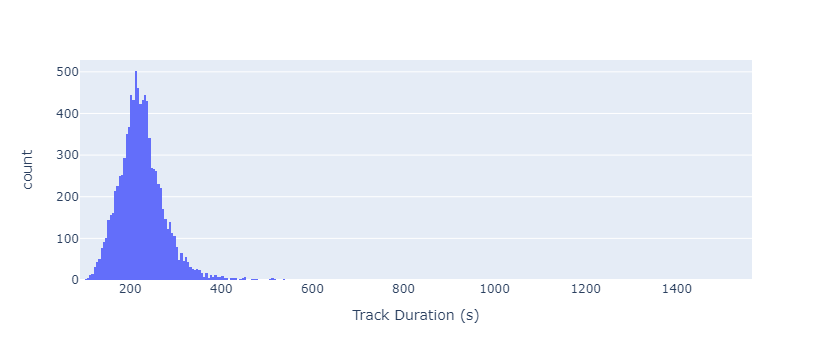

In [18]:
track_duration = px.histogram(top_songs, x="Track Duration (s)")
track_duration.show()

# Few outliers, The plan for now is that I will end up dropping the ones that are severe outliers

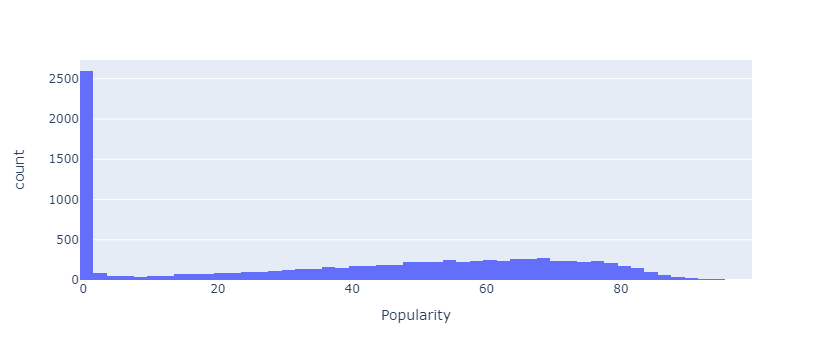

In [20]:
popularity = px.histogram(top_songs, x="Popularity")
track_duration.show()

# I think I will replace all 0 values with N/A because most don't 
# have an accurate one, or drop popularity column I am not sure yet

Data Dictionary:

Track Name: name of the track
Artist Name(s): name of the artists
Album Name: name of the album
Explicit: whether the song is explicit or not
Artist genres: the genres the artist falls under
Popularity: the popularity of the song ranked by users
Track duration (s): the length of the track in seconds
Album Release Date: the date the album was released

Ideas for UI components:
1. Show pie graph of songs based on genre
2. Show line graph of time and be able to hover over markers on line graph to view individual songs at the time they were released
3. Show bar graph showing which artists have the most songs/albums in this top 10000 list